# BCI homework

# Brain-Computer Interfaces (Fall 2017, ELE 594)
# Instructor: Yalda Shahriari

# 1st homework, 9/23/17 (The homework, is due by Oct 4, 11:55 pm).

# Instruction: 
Load the “sampleEEGdata” into your Matlab workspace. 
This EEG dataset contains 64 channels (EEG.nbchan), 640 time points (EEG.pnts), and 99 trials (EEG.trials). 
The time points in ms has been saved in EEG.times where you can see each trial has been started 
from -1000 ms and ends at ~1500 ms. 
Use the topoplot.m function for plotting the head plots. 
Save the ‘eloc64C2.txt’ file in the same directory as the topoplot.m function for further analysis. 

In [1]:
# Here are the functions, 
# which reconstructs the dictionaries just use this loadmat instead of scipy.io's loadmat:

import scipy.io as spio
import numpy as np

sampleEEGdata = spio.loadmat('sampleEEGdata.mat')  #.loa ('sampleEEGdata.mat')
# sampleEEGdata['EEG'][0, 0].dtype
eeg = sampleEEGdata['EEG'][0, 0]
eeg.dtype

dtype([('setname', 'O'), ('filename', 'O'), ('filepath', 'O'), ('subject', 'O'), ('group', 'O'), ('condition', 'O'), ('session', 'O'), ('comments', 'O'), ('nbchan', 'O'), ('trials', 'O'), ('pnts', 'O'), ('srate', 'O'), ('xmin', 'O'), ('xmax', 'O'), ('times', 'O'), ('data', 'O'), ('icaact', 'O'), ('icawinv', 'O'), ('icasphere', 'O'), ('icaweights', 'O'), ('icachansind', 'O'), ('chanlocs', 'O'), ('urchanlocs', 'O'), ('chaninfo', 'O'), ('ref', 'O'), ('event', 'O'), ('urevent', 'O'), ('eventdescription', 'O'), ('epoch', 'O'), ('epochdescription', 'O'), ('reject', 'O'), ('stats', 'O'), ('specdata', 'O'), ('specicaact', 'O'), ('splinefile', 'O'), ('icasplinefile', 'O'), ('dipfit', 'O'), ('history', 'O'), ('saved', 'O'), ('etc', 'O'), ('spedata', 'O')])

In [2]:
# Use the topoplot.m function for plotting the head plots.
# Creating mne Objects from numpy arrays for Visualizing the epochs/ topomap plot
import mne as mne

labels = []
XYZs = []
eeg['chanlocs']['labels'][0, 0][0]
eeg['chanlocs']['labels'].shape[1]
for idx in range(eeg['chanlocs']['labels'].shape[1]):
    # channel labels or electrode labels
    label = eeg['chanlocs']['labels'][0, idx][0]
    #     print(label)
    labels.append(label)
    
    # channel location or electrode location
    X = eeg['chanlocs']['X'][0, idx][0][0]
    Y = eeg['chanlocs']['Y'][0, idx][0][0]
    Z = eeg['chanlocs']['Z'][0, idx][0][0]
    XYZs.append(np.array([X, Y, Z], dtype=float))

ch_location = np.array(XYZs, dtype=float) # channels or electrodes location
ch_names = labels # mat['ch_names'].tolist(): channels or electrodes names/ labels
dig_ch_pos = dict(zip(ch_names, ch_location))
montage = mne.channels.DigMontage(dig_ch_pos=dig_ch_pos)

sfreq = eeg['srate'][0, 0]

# It is also possible to use info from another raw object.
info = mne.create_info(ch_names=ch_names, ch_types='eeg', montage=montage, sfreq=sfreq)

# eeg['data'][0, 0, 0]: channels, time, epochs
data = eeg['data'].transpose(2, 0, 1) # epcohs/ trials, channels, time
# data.shape  # data : array, shape (n_epochs, n_channels, n_times)

tmin = eeg['xmin'][0, 0]
tmax = eeg['xmax'][0, 0]
picks = mne.pick_types(info=info, eeg=True)

# Visualizing the epochs/ topomap plot
epochs = mne.EpochsArray(data=data, info=info, tmin=tmin)

# Shrinking the data from 3 axis or 3 dim to 2 dim or getting rid of epochs/trials
evoked = epochs.average(picks=picks)
data2 = evoked.data
data2.shape

99 matching events found
0 projection items activated
0 bad epochs dropped


(64, 640)

In [3]:
# Save the ‘eloc64C2.txt’ file in the same directory as the topoplot.m function for further analysis.
% ls

.ipynb_checkpoints/           bci-hw1-Copy5.ipynb
Analyzing_Neural_Time_Series/ bci-hw1-Copy6.ipynb
Channel Description.txt*      bci-hw1-Copy7.ipynb
HW1.pdf                       bci-hw1-Copy8.ipynb
README                        bci-hw1-Copy9.ipynb
bci-hw1-Copy1.ipynb           bci-hw1.ipynb
bci-hw1-Copy10.ipynb          eloc64C2.txt*
bci-hw1-Copy2.ipynb           mne_examples/
bci-hw1-Copy3.ipynb           sampleEEGdata.mat*
bci-hw1-Copy4.ipynb           topoplot.m*


In [42]:
# g) (Optional) Now consider the frequency range varies between 2Hz to 30Hz in two steps.
# Instead of constant cycle equivalent to 4 (what we had before), 
# consider variable cycles ranging between [3 10] cycle. 
# Based on your total number of frequencies, 
# you can define constant steps for your cycles where it starts from 3 cycles and ends at 10 cycles. 

# 3 would correspond to the minimum frequency (i.e. 2 Hz) and 10 would correspond to the maximum frequency 
# (i.e. 30 Hz).

# Considering only channel ‘FCz’, for each frequency, obtain the power for all the trials (i.e. 99).

# Get the average of the powers over all the trials. 

# Apply baseline correction by dividing the obtained results to the average baseline power (i.e. [-500 -200 ms]). 

# The resulting matrix size would be 20 x 640. 

# Plot the time-frequency map where the x-axis is the time [-200 1000 ms], 
# y-axis is the frequency [2 30 Hz], and color corresponds to 10log10 (power). 

# Make the colormaps in ‘jet’ format and the color-limit to [-3 3]. 

# Repeat the same process with fixed cycle 4 for all the frequencies.

# Compare your results between two conditions of fixed and variable cycles and explain your observations. 

freq: 2.0 cycles: 3.0 scale: 0.833333333333


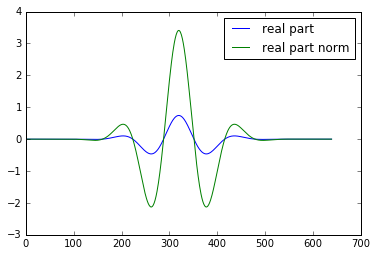

freq: 4.0 cycles: 3.1794871794871793 scale: 1.57258064516


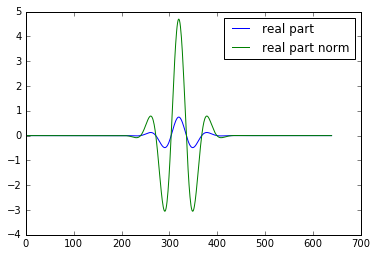

freq: 6.0 cycles: 3.358974358974359 scale: 2.23282442748


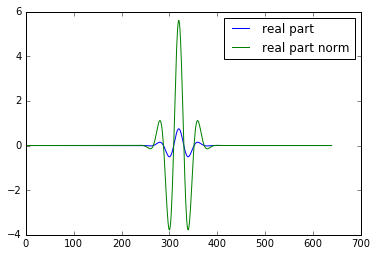

freq: 8.0 cycles: 3.5384615384615383 scale: 2.82608695652


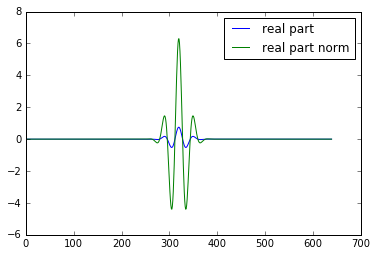

freq: 10.0 cycles: 3.717948717948718 scale: 3.36206896552


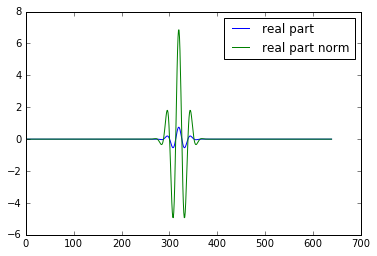

freq: 12.0 cycles: 3.8974358974358974 scale: 3.84868421053


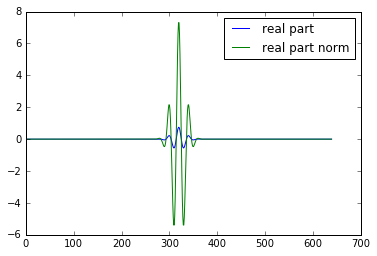

freq: 14.0 cycles: 4.076923076923077 scale: 4.29245283019


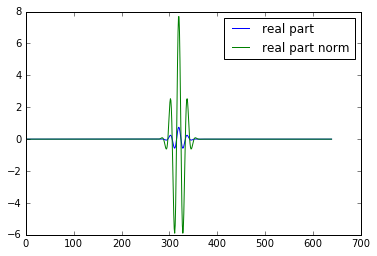

freq: 16.0 cycles: 4.256410256410256 scale: 4.69879518072


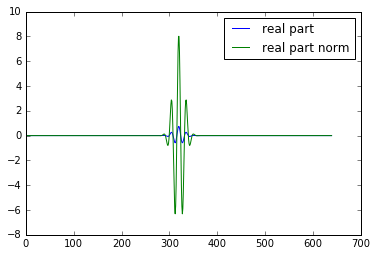

freq: 18.0 cycles: 4.435897435897436 scale: 5.07225433526


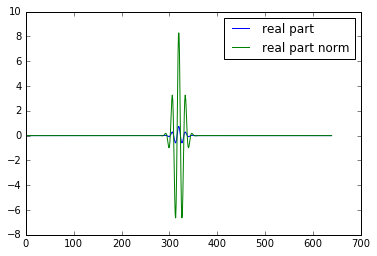

freq: 20.0 cycles: 4.615384615384615 scale: 5.41666666667


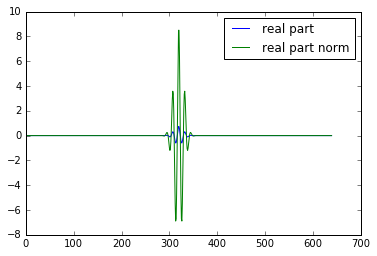

freq: 22.0 cycles: 4.794871794871795 scale: 5.73529411765


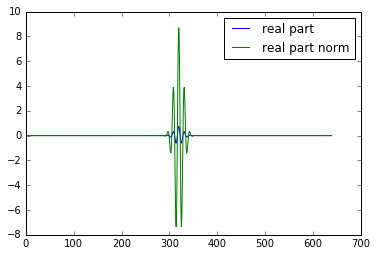

freq: 24.0 cycles: 4.9743589743589745 scale: 6.03092783505


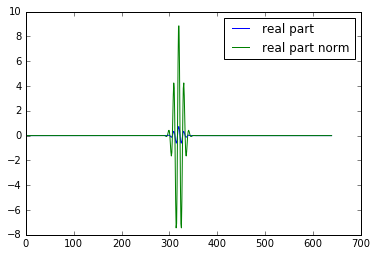

freq: 26.0 cycles: 5.153846153846153 scale: 6.30597014925


/Users/arasdar/anaconda3/envs/arasdar-DL-env/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in true_divide


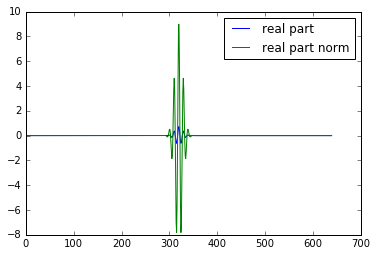

freq: 28.0 cycles: 5.333333333333334 scale: 6.5625


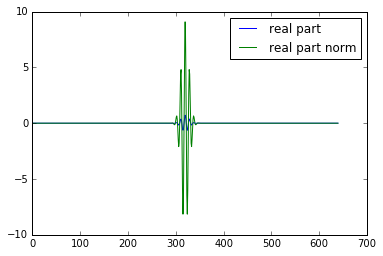

freq: 30.0 cycles: 5.512820512820513 scale: 6.8023255814


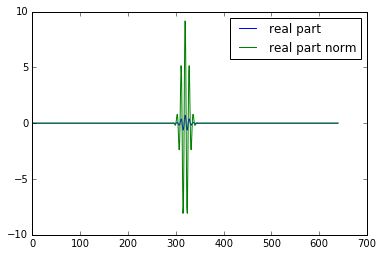

freq: 32.0 cycles: 5.6923076923076925 scale: 7.02702702703


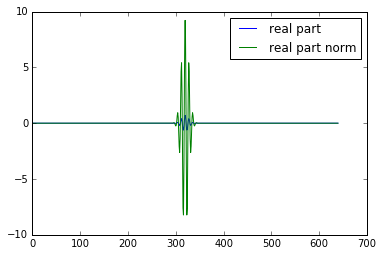

freq: 34.0 cycles: 5.871794871794872 scale: 7.23799126638


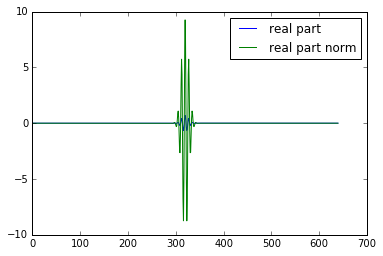

freq: 36.0 cycles: 6.051282051282051 scale: 7.43644067797


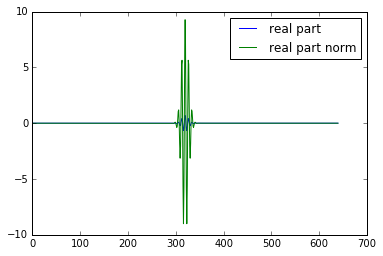

freq: 38.0 cycles: 6.230769230769231 scale: 7.62345679012


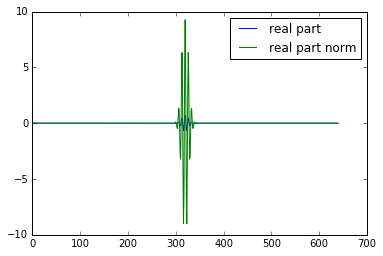

freq: 40.0 cycles: 6.410256410256411 scale: 7.8


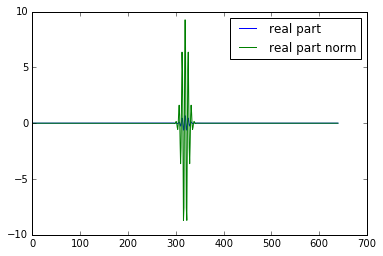

freq: 42.0 cycles: 6.589743589743589 scale: 7.96692607004


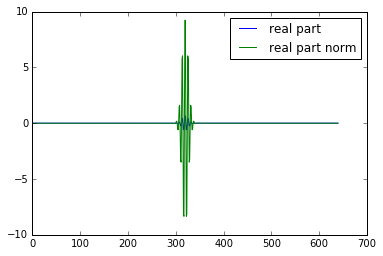

freq: 44.0 cycles: 6.769230769230769 scale: 8.125


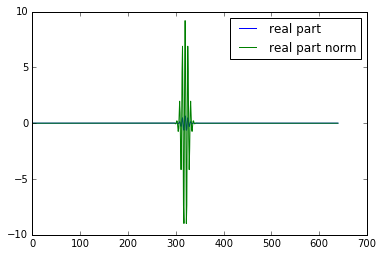

freq: 46.0 cycles: 6.948717948717949 scale: 8.27490774908


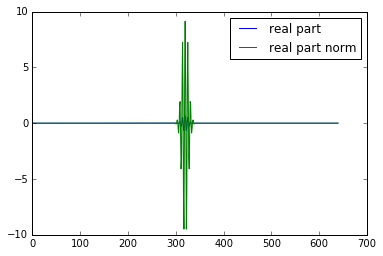

freq: 48.0 cycles: 7.128205128205129 scale: 8.41726618705


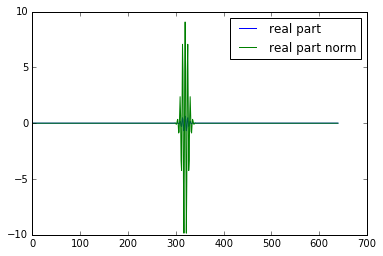

freq: 50.0 cycles: 7.3076923076923075 scale: 8.55263157895


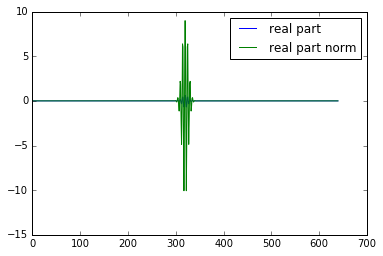

freq: 52.0 cycles: 7.487179487179487 scale: 8.68150684932


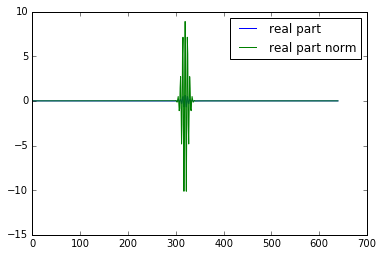

freq: 54.0 cycles: 7.666666666666667 scale: 8.80434782609


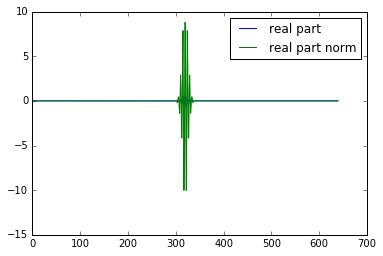

freq: 56.0 cycles: 7.846153846153846 scale: 8.92156862745


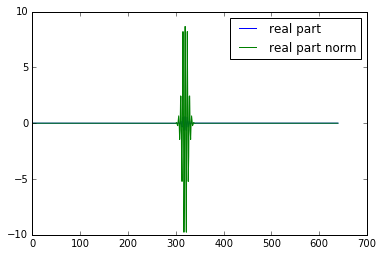

freq: 58.0 cycles: 8.025641025641026 scale: 9.03354632588


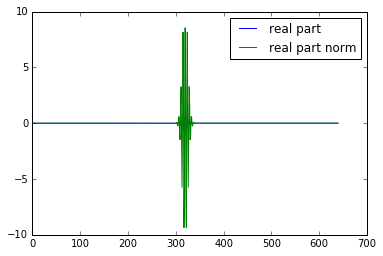

freq: 60.0 cycles: 8.205128205128204 scale: 9.140625


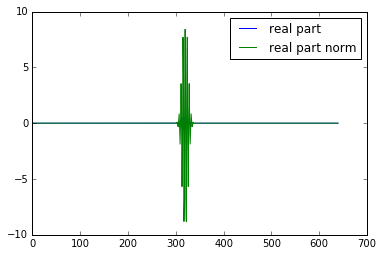

freq: 62.0 cycles: 8.384615384615385 scale: 9.24311926606


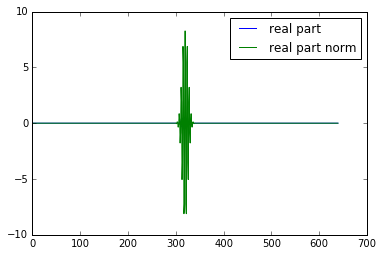

freq: 64.0 cycles: 8.564102564102564 scale: 9.34131736527


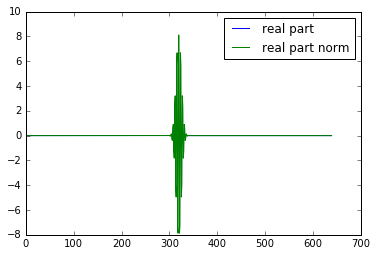

freq: 66.0 cycles: 8.743589743589745 scale: 9.43548387097


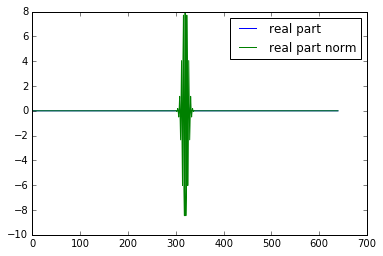

freq: 68.0 cycles: 8.923076923076923 scale: 9.52586206897


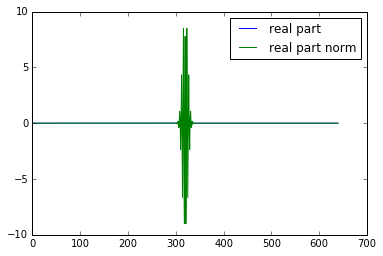

freq: 70.0 cycles: 9.102564102564102 scale: 9.61267605634


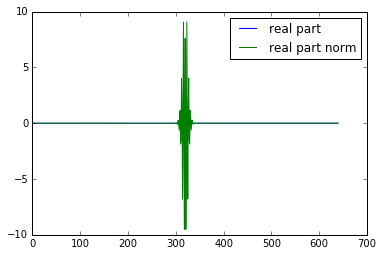

freq: 72.0 cycles: 9.282051282051281 scale: 9.69613259669


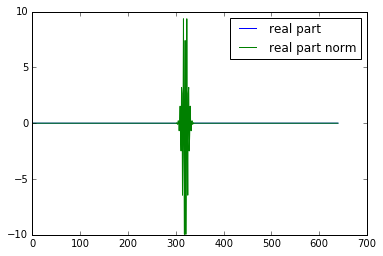

freq: 74.0 cycles: 9.461538461538462 scale: 9.77642276423


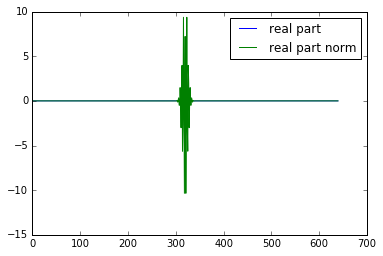

freq: 76.0 cycles: 9.641025641025642 scale: 9.85372340426


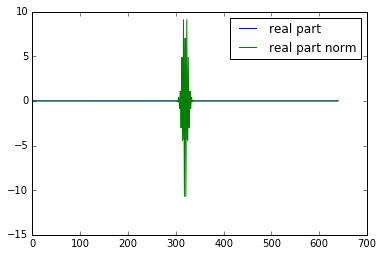

freq: 78.0 cycles: 9.820512820512821 scale: 9.92819843342


/Users/arasdar/anaconda3/envs/arasdar-DL-env/lib/python3.5/site-packages/ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in true_divide


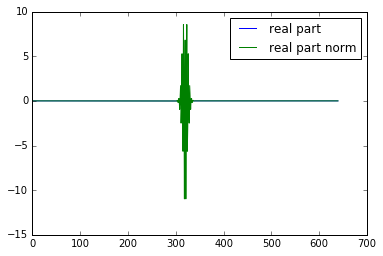

freq: 80.0 cycles: 10.0 scale: 10.0


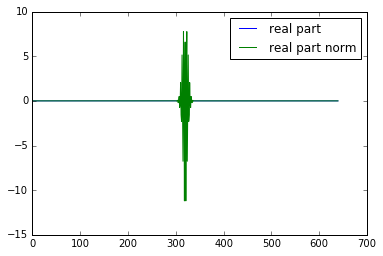

In [43]:
import scipy.signal as sp_signal
import matplotlib.pyplot as plt

# r: Sampling rate of EEG and the length of EEG signal
# M: number of points in a channel should be equal to the EEG signal length
# s: constant number of cycles -2*pi*s to +2*pi*s
# f: Wavelet freq for activity  pattern recognition
# w: The number of cycles/ period of the phase/real part
r, s, w, M, f = eeg['srate'][0, 0], 1.0, 3.0, data2.shape[1], 2
wavelet_bank = []

def normalize(X):
    return (X - X.mean(axis=0))/ X.std(axis=0)

# Wavelet frequencies from 2 Hz to 30 Hz: 7 choices, 28 = 7 * 4
# Number of cycles from 3 cycles to 10 cycles: 7 choices
# for w in range(3, 11, 1): # including 3 and 10
# f = (2*s*r*w)/ M
# for f in range(2, 42, 2): # start=2Hz, stop=42, step=2, 42-2=40, 40/2=20
for step in range(0, 40, 1): # start=2Hz, stop=42, step=2, 42-2=40, 40/2=20
    # f: 2 to 40, 38/19, step 2
    # W: 3 to 10,  7/19=0.35 step
    w = 3 + ((7/39) * step) 
    f = 2 + ((78/39) * step)
    # w = (f*M) / (2*s*r)
    s = (f*M) / (2*w*r)
    print('freq:', f, 'cycles:', w, 'scale:', s)

    wavelet = sp_signal.morlet(M=M, w=w, s=s, complete=True)
    wavelet_bank.append(wavelet)

    # Now calculate Amplitude & Phase
    A = ((wavelet.real**2) + (wavelet.imag**2))**0.5
    A_norm = normalize(X=A)
    P = np.arctan(wavelet.imag/wavelet.real) # imag=y, real=x
    P_norm = normalize(X=P)
    wavelet_real_norm = normalize(X=wavelet.real)
    wavelet_imag_norm = normalize(X=wavelet.imag)

    # plotting
    plt.plot(wavelet.real, label='real part')
#     plt.plot(wavelet.imag, label='imag part')
    plt.plot(wavelet_real_norm, label='real part norm')
#     plt.plot(wavelet_imag_norm, label='imag part norm')
#     plt.plot(A, label='Amplitude part')
#     plt.plot(A_norm, label='Amplitude part norm')
#     plt.plot(P, label='Phase part')
#     plt.plot(P_norm, label='Phase part norm')
    plt.legend()
    plt.show()

In [44]:
# #  Convolving the data with one wavelet, extracting real and imag part and calculate 
# # Amplitude for time domain patterns and 
# # Phase for frequency domain patterns
# data_KxAPxCxT = [] 
# for each_wavelet in wavelet_bank:
#     Amp, Phase, Amp_norm, Phase_norm = [], [], [], [] # Amplitude, Phase
#     b_real, b_imag, b_real_norm, b_imag_norm = [], [], [], [] # convolved output
    
#     for each_ch in data2: # for all channels
#         # Real and imaginary part of the complex output of convolution
#         b = np.convolve(a=each_ch, mode='same', v=each_wavelet)
#         b_real_norm = normalize(X=b.real)
#         b_imag_norm = normalize(X=b.imag)
        
#         # Amplitude and Phase of the complex output of convolution
#         A = ((b.real**2) + (b.imag**2))**0.5
#         A_norm = normalize(X=A)
#         P = np.arctan(b.imag/b.real) # imag=y, real=x 
#         P_norm = normalize(X=P)
#         Amp_norm.append(A_norm)
#         Phase_norm.append(P_norm)
        
#     # AP: Amp-Phase, C: Channel, T: time samples    
#     APxCxT = []
#     APxCxT.append(Amp_norm)
#     APxCxT.append(Phase_norm)
#     APxCxT = np.array(APxCxT)
#     data_KxAPxCxT.append(APxCxT)
    
# data_KxAPxCxT = np.array(data_KxAPxCxT)
# data_KxAPxCxT.shape # kx2xCxN: (7, 2, 448, 640)

In [45]:
# # Visualizing the convloved data with the wavelet kernel banks for filter banks
# tmin, tmax = eeg['xmin'][0, 0], eeg['xmax'][0, 0]
# times = np.arange(tmin, tmax, 0.2)
# for each_APxCxT in data_KxAPxCxT:
#     evoked_Amp = mne.EvokedArray(data=each_APxCxT[0], info=info) # ERP: Event related potential, average
#     evoked_Phase = mne.EvokedArray(data=each_APxCxT[1], info=info) # ERP: Event related potential, average
#     evoked_Amp.plot_topomap(times=times+1, title='Amplitude') # - channel {}'.format()
#     evoked_Phase.plot_topomap(times=times+1, title='Phase')
# #     evoked_Amp.plot(spatial_colors=True, gfp=True, picks=picks, titles='power')    
# #     evoked_Phase.plot(spatial_colors=True, gfp=True, picks=picks, titles='phase')

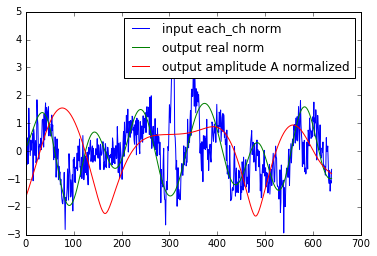

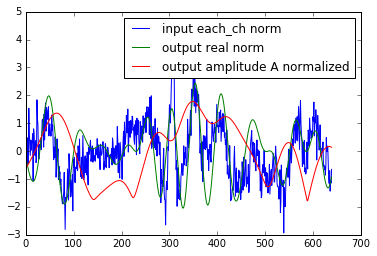

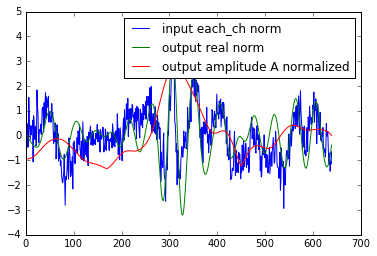

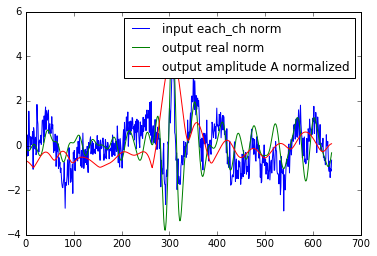

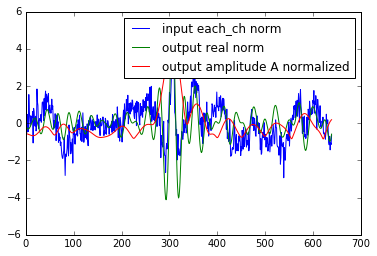

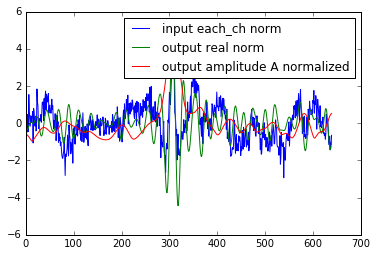

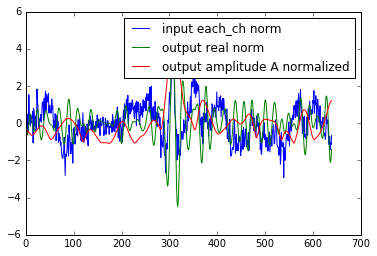

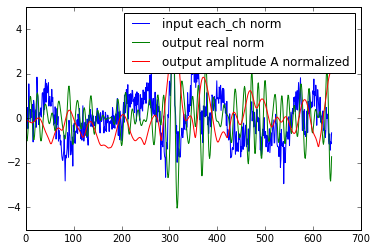

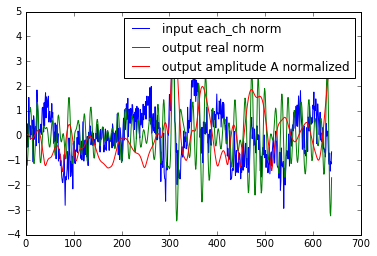

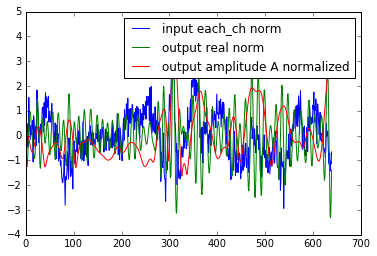

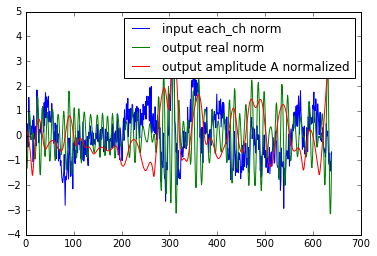

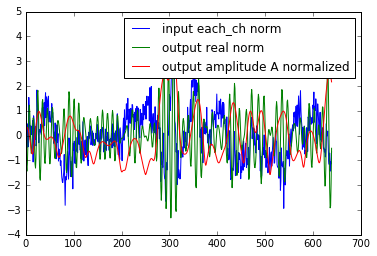

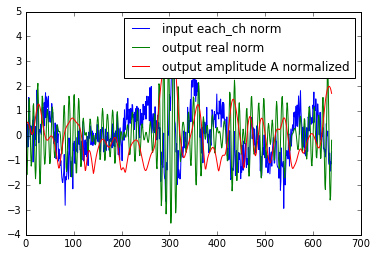

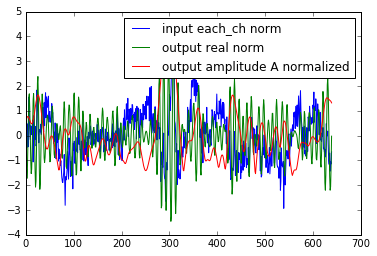

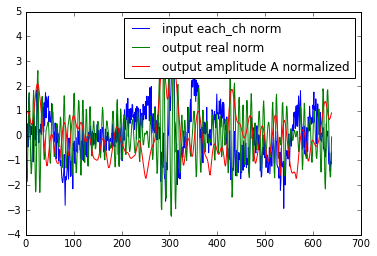

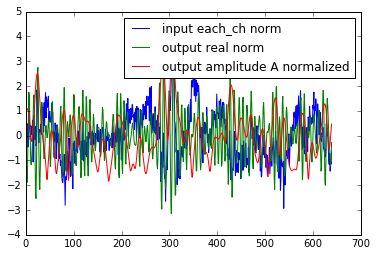

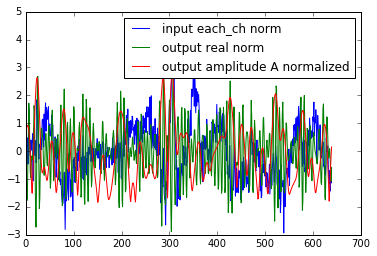

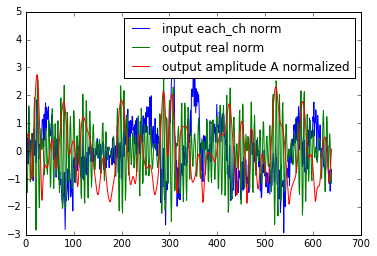

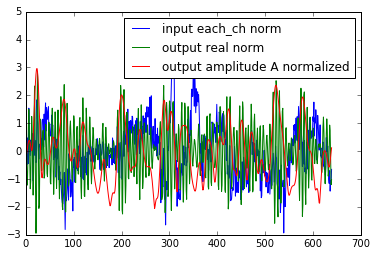

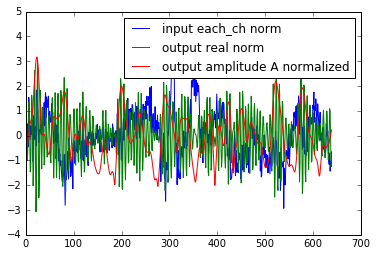

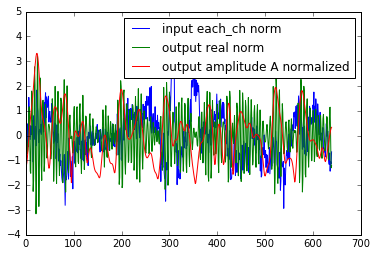

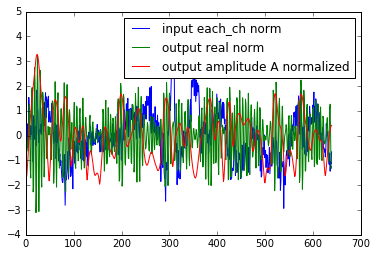

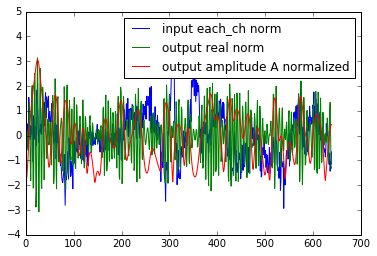

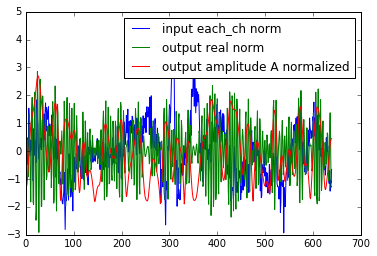

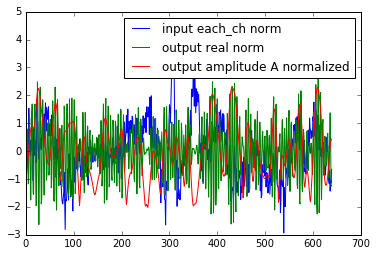

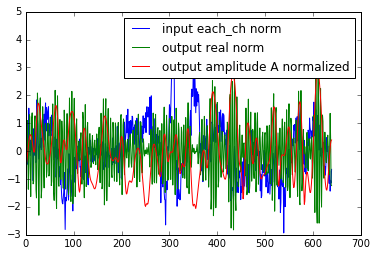

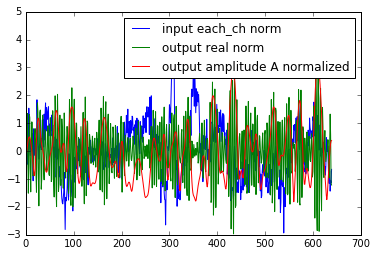

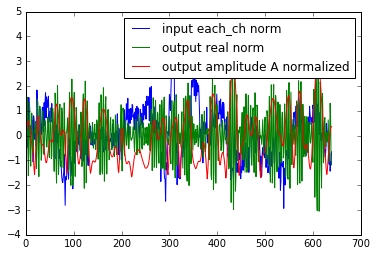

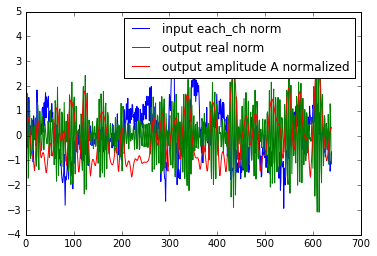

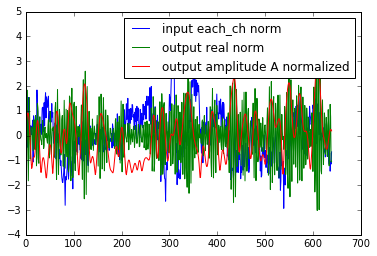

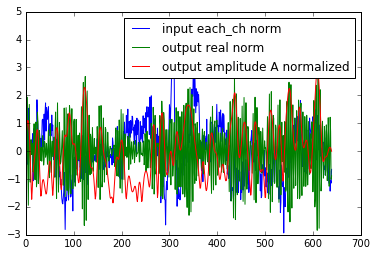

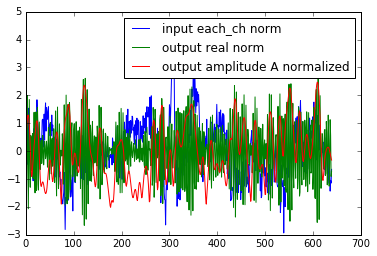

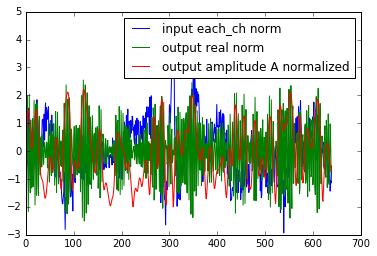

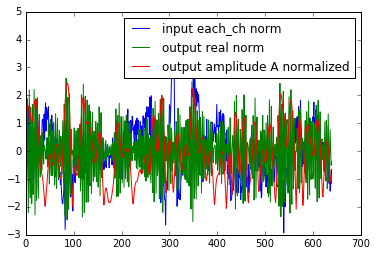

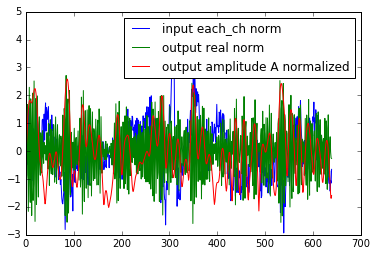

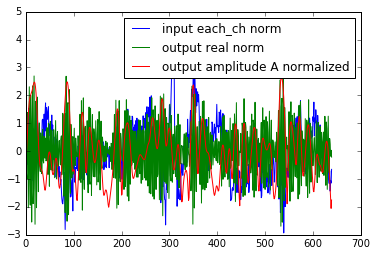

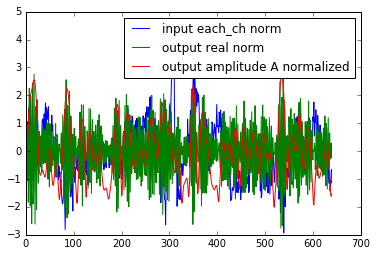

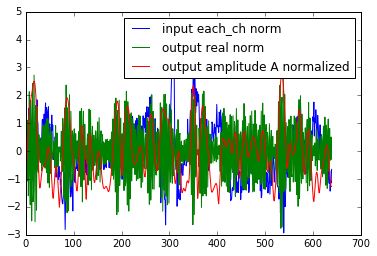

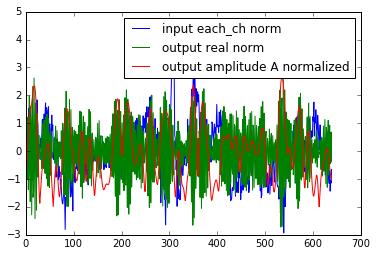

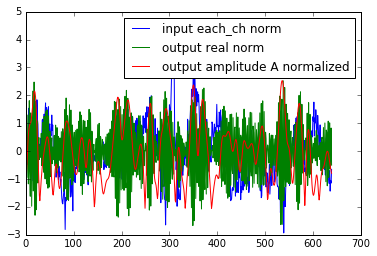

In [46]:
# for each_wavelet in wavelet_bank:
for idx_wvl in range(len(wavelet_bank)):
    Amp, Phase, Amp_norm, Phase_norm = [], [], [], [] # Amplitude, Phase
    b_real, b_imag, b_real_norm, b_imag_norm = [], [], [], [] # convolved output
    
    # for each_ch in data2: # for all channels
    for idx_ch in range(0, 1, 1): # for all channels

        # Real and imaginary part of the complex output of convolution
        b = np.convolve(a=data2[idx_ch], mode='same', v=wavelet_bank[idx_wvl])
        data_norm = normalize(X=data2[idx_ch])
        b_real_norm = normalize(X=b.real)
        b_imag_norm = normalize(X=b.imag)
        
        # Amplitude and Phase of the complex output of convolution
        A = ((b.real**2) + (b.imag**2))**0.5
        A_norm = normalize(X=A)
        P = np.arctan(b.imag/b.real) # imag=y, real=x 
        P_norm = normalize(X=P)
    
        # ploting the convolved signal
#         plt.plot(data2[idx_ch], label='input each_ch')
        plt.plot(data_norm, label='input each_ch norm')
        # plt.plot(b.real, label='output real')
        plt.plot(b_real_norm, label='output real norm')
        # plt.plot(b.imag, label='output imag')
        # plt.plot(A, label='output amplitude A')
        plt.plot(A_norm, label='output amplitude A normalized')
        # plt.plot(P, label='output phase P')
        plt.legend()
        plt.show()

In [47]:


# Considering only channel ‘FCz’, for each frequency, obtain the power for all the trials (i.e. 99).
# Get the average of the powers over all the trials. 
# Apply baseline correction by dividing the obtained results to the average baseline power (i.e. [-500 -200 ms]). 
# The resulting matrix size would be 20 x 640. 
# Plot the time-frequency map where the x-axis is the time [-200 1000 ms], 
# y-axis is the frequency [2 30 Hz], and color corresponds to 10log10 (power). 
# Make the colormaps in ‘jet’ format and the color-limit to [-3 3]. 
index = ch_names.index('FCz')
# data[index].shape
data_FCz = eeg['data'][index].T
data_FCz.shape, len(wavelet_bank), data.shape

((99, 640), 40, (99, 64, 640))

In [48]:
#  Convolving the data with one wavelet, extracting real and imag part and calculate 
# Amplitude for time domain patterns and 
# Phase for frequency domain patterns
data_KxTxN = [] 

data_KxTxN_norm = [] 

for each_wavelet in wavelet_bank:
    Amp, Phase, Amp_norm, Phase_norm = [], [], [], [] # Amplitude, Phase
    b_real, b_imag, b_real_norm, b_imag_norm = [], [], [], [] # convolved output
    
    for each_trial in data_FCz: # for all channels
        # Real and imaginary part of the complex output of convolution
        b = np.convolve(a=each_trial, mode='same', v=each_wavelet)
        b_real_norm = normalize(X=b.real)
        b_imag_norm = normalize(X=b.imag)
        
        # Amplitude and Phase of the complex output of convolution
        A = ((b.real**2) + (b.imag**2))**0.5
        A_norm = normalize(X=A)
        
#         P = np.arctan(b.imag/b.real) # imag=y, real=x 
#         P_norm = normalize(X=P)
        Amp_norm.append(A_norm)
        Amp.append(A)
#         Phase_norm.append(P_norm)
        
    data_KxTxN_norm.append(Amp_norm)
    data_KxTxN.append(Amp)
    
data_KxTxN = np.array(data_KxTxN)

data_KxTxN_norm = np.array(data_KxTxN_norm)

data_KxTxN.shape # kx2xCxN: (7, 2, 448, 640)

(40, 99, 640)

In [49]:
data_KxN = data_KxTxN.mean(axis=1) # 20x640

data_KxN_norm = data_KxTxN_norm.mean(axis=1) # 20x640

data_KxN.shape

(40, 640)

In [50]:
# Apply baseline correction by dividing the obtained results 
# to the average baseline power (i.e. [-500 -200 ms]).
srate = eeg['srate'][0, 0]
low = int(0.5 * srate) # -1000 - (-500) = 500, srate = 1/T, t/T, t/(1/f)= t*f
length = int(0.3 * srate) # -500 - (-200) = -300, srate = 1/T, t/T, t/(1/f)= t*f
low, length, low+length
data_KxN[:, low: (low+length)].shape
baseline = data_KxN[:, low: (low+length)].copy()
baseline.shape, baseline.mean(axis=1).shape
average_baseline_power = baseline.mean(axis=1).reshape(-1, 1)
data_KxN_baseline_corrected =  data_KxN/ average_baseline_power
data_KxN_baseline_corrected.shape

(40, 640)

In [51]:
# (data_KxN - (2*data_KxN.min())).min()

# data_KxN_trans = data_KxN - (2*data_KxN.min())

# data_KxN_color = 10 * np.log10(data_KxN_trans)
# data_KxN_color.shape

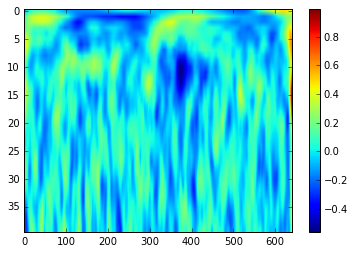

In [55]:
# Plot the time-frequency map where the
# x-axis is the time [-200 1000 ms], 
# y-axis is the frequency [2 42 Hz], and 
# color corresponds to 10log10 (power). 
# x = np.arange(-1500, 1000, 1) # milisecond or ms
# y = np.arange(2, 42, 2) # Hz for frequency
# plt.Figure(figsize= (20, 10), )
# plt.imshow(shape=(20, 20), X=data_KxN)
# plt.imshow(X=data_KxN, aspect=40, extent=(-1500, 1000, 2, 40)) #cmap=10 * np.log10(data_KxN)
plt.imshow(X=data_KxN_norm, aspect='auto') #cmap=10 * np.log10(data_KxN)
plt.colorbar()
plt.show()

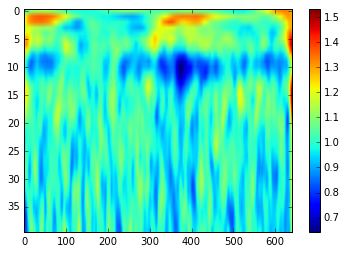

In [56]:
# plt.imshow(X=data_KxN_baseline_corrected - data_KxN_baseline_corrected.mean(), aspect=40, extent=(-1500, 1000, 40, 2)) #cmap=10 * np.log10(data_KxN)

plt.imshow(X=data_KxN_baseline_corrected, aspect='auto') #cmap=10 * np.log10(data_KxN)



plt.colorbar()
plt.show()

In [54]:
# # plt.imshow(X=data_KxN_baseline_corrected, aspect=40, extent=(-1500, 1000, 2, 40)) #cmap=10 * np.log10(data_KxN)

# plt.imshow(X=normalize(data_KxN_baseline_corrected), aspect=40) #cmap=10 * np.log10(data_KxN)



# plt.colorbar()
# plt.show()